In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]
    

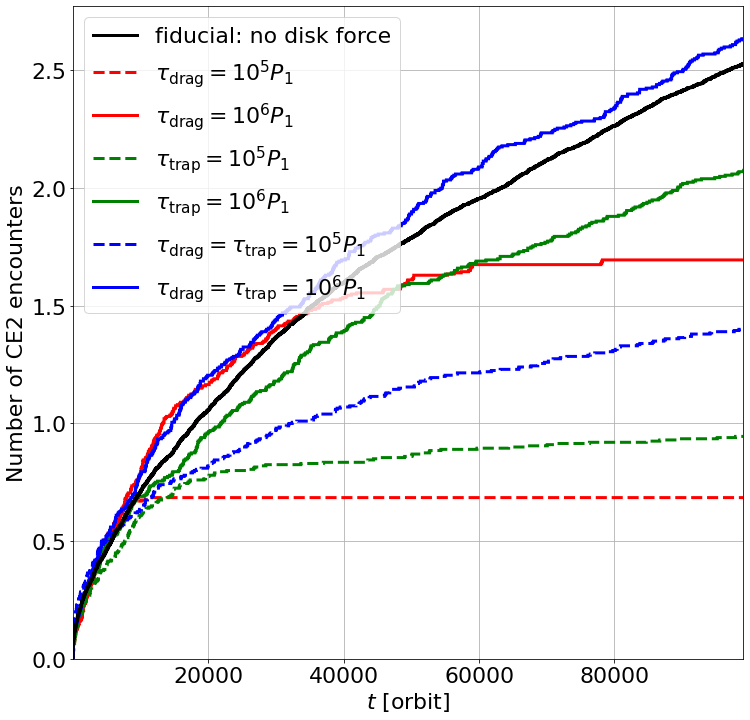

In [4]:
## 
##  Read the data for damping runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc(np.load('../data/can_CE0-2000.npy'),rc)

dd_t5 = limit_rc(np.load('../data/df_d5tx.npy'),rc)
dd_t6 = limit_rc(np.load('../data/df_d6tx.npy'),rc)

dt_t5 = limit_rc(np.load('../data/df_dxt5.npy'),rc)
dt_t6 = limit_rc(np.load('../data/df_dxt6.npy'),rc)

d_t5t5 = limit_rc(np.load('../data/df_d5t5.npy'),rc)
d_t6t6 = limit_rc(np.load('../data/df_d6t6.npy'),rc)

##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$t$ [orbit]')
axs.set_ylabel(r'Number of CE2 encounters')
axs.set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./200.
lw = 3
aluse = 0.1


# drag

axs.hist(dd_t5[:,0], bins=t_bins,linewidth=lw,
            weights=dd_t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r',ls='--')

axs.hist(dd_t6[:,0], bins=t_bins,linewidth=lw,
            weights=dd_t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r',ls='-')


# migration trap

axs.hist(dt_t5[:,0], bins=t_bins,linewidth=lw,
            weights=dt_t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='g',ls='--')

axs.hist(dt_t6[:,0], bins=t_bins,linewidth=lw,
            weights=dt_t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='g',ls='-')



axs.hist(d_t5t5[:,0], bins=t_bins,linewidth=lw,
            weights=d_t5t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='b',ls='--')

axs.hist(d_t6t6[:,0], bins=t_bins,linewidth=lw,
            weights=d_t6t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='b',ls='-')

# no damping

axs.hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw/10.,density=False,cumulative=True,histtype='step',
            color='k',ls='-')


# Legend
axs.plot([],[],lw=lw,label=r'fiducial: no disk force',color='k',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^5P_1$',color='r',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^6P_1$',color='r',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^5P_1$',color='g',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^6P_1$',color='g',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^5P_1$',color='b',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^6P_1$',color='b',ls='-')

axs.legend(loc=2)
axs.grid()
axs.set_axisbelow(True)



##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t-tau.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t-tau.png',bbox_inches='tight',transparent=True)
